In [ ]:
import pandas as pd
import math
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import mean_squared_log_error



from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [ ]:
# train = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/train.csv")

train_data = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/test.csv")

train_data.columns = train_data.columns.str.replace(' ','')
test_data.columns = test_data.columns.str.replace(' ','')

train_weather_df = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/train_weather.csv")
test_weather_df = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/test_weather.csv")



# train_weather = pd.read_csv('train_weather.csv')
# test_weather = pd.read_csv('test_weather.csv')

In [ ]:
df = train_data
# locations = list(['Location 7', 'Location 6', 'Location 8'])

In [ ]:
df6 = df[(df['LOCATION'] == 'Location 6')]
df7 = df[(df['LOCATION'] == 'Location 7')]
df8 = df[(df['LOCATION'] == 'Location 8')]

# titanic[titanic[""] > 35]

In [ ]:
frames = [df6, df7, df8]
result = pd.concat(frames)

###Clean Data

In [ ]:
import re
def convertTimetoSec(time):
  
  if type(time) != str:
    return time

  parts = [float(p) for p in time.split(':')]
  # print(parts)
  parts = [p * (60 ** i) for i, p in enumerate(reversed(parts))]
  return sum(parts)
  

def cleanData(df):
  df.dropna(subset=['S1', 'S2'])
  df['S1'] = df['S1'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['S2'] = df['S2'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['S3'] = df['S3'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['ELAPSED'] = df['ELAPSED'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['HOUR'] = df['HOUR'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['PIT_TIME'] = df['PIT_TIME'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['S1_LARGE'] = df['S1_LARGE'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['S2_LARGE'] = df['S2_LARGE'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  df['S3_LARGE'] = df['S3_LARGE'].apply(lambda time: 0 if pd.isna(time) else convertTimetoSec(time))
  
  df['GROUP'].fillna(0, inplace=True)
  df['POWER'].fillna(df['POWER'].mean(), inplace=True)
  df['KPH'].fillna(df['KPH'].mean(), inplace=True)


  # df['CROSSING_FINISH_LINE_IN_PIT'].fillna('A', inplace=True)
  
  del df['CROSSING_FINISH_LINE_IN_PIT']
  del df['DRIVER_NUMBER']
  return df



###Label Encoding

In [ ]:

train1 = cleanData(train)
train1.head()


train.rename(columns={" DRIVER_NUMBER": "DRIVER_NUMBER", " LAP_NUMBER": "LAP_NUMBER", " LAP_IMPROVEMENT":"LAP_IMPROVEMENT"}, inplace=True)
train.rename(columns={" CROSSING_FINISH_LINE_IN_PIT": "CROSSING_FINISH_LINE_IN_PIT", " S1": "S1", " S1_IMPROVEMENT":"S1_IMPROVEMENT"}, inplace=True)
train.rename(columns={" S3": "S3", " S3_IMPROVEMENT":"S3_IMPROVEMENT", " S2": "S2", " S2_IMPROVEMENT":"S2_IMPROVEMENT", " KPH":"KPH", " ELAPSED":"ELAPSED"}, inplace=True)
train.rename(columns={" HOUR": "HOUR"}, inplace=True)
train.dtypes



In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(list(train['CROSSING_FINISH_LINE_IN_PIT']))
train['CROSSING_FINISH_LINE_IN_PIT'] = le.transform(list(train['CROSSING_FINISH_LINE_IN_PIT']))

le = preprocessing.LabelEncoder()
le.fit(list(train['DRIVER_NAME']))
train['DRIVER_NAME'] = le.transform(list(train['DRIVER_NAME']))

le = preprocessing.LabelEncoder()
le.fit(list(train['TEAM']))
train['TEAM'] = le.transform(list(train['TEAM']))

le = preprocessing.LabelEncoder()
le.fit(list(train['LOCATION']))
train['LOCATION'] = le.transform(list(train['LOCATION']))

le = preprocessing.LabelEncoder()
le.fit(list(train['EVENT']))
train['EVENT'] = le.transform(list(train['EVENT']))

train['DRIVER_NAME']=train['DRIVER_NAME'].replace(0, 25)
train['LOCATION']=train['LOCATION'].replace(0, 8)
train['TEAM']=train['TEAM'].replace(0, 24)
train['EVENT']=train['EVENT'].replace(0, 8)

train.to_csv('train_clean_Label_encoded.csv', index=False)


In [ ]:
test = cleanData(test)
test.head()

In [ ]:
test.rename(columns={" DRIVER_NUMBER": "DRIVER_NUMBER", " LAP_NUMBER": "LAP_NUMBER", " LAP_IMPROVEMENT":"LAP_IMPROVEMENT"}, inplace=True)
test.rename(columns={" CROSSING_FINISH_LINE_IN_PIT": "CROSSING_FINISH_LINE_IN_PIT", " S1": "S1", " S1_IMPROVEMENT":"S1_IMPROVEMENT"}, inplace=True)
test.rename(columns={" S3": "S3", " S3_IMPROVEMENT":"S3_IMPROVEMENT", " S2": "S2", " S2_IMPROVEMENT":"S2_IMPROVEMENT", " KPH":"KPH", " ELAPSED":"ELAPSED"}, inplace=True)
test.rename(columns={" HOUR": "HOUR"}, inplace=True)
test.dtypes


In [ ]:

le = preprocessing.LabelEncoder()
le.fit(list(train['CROSSING_FINISH_LINE_IN_PIT']))
test['CROSSING_FINISH_LINE_IN_PIT'] = le.transform(list(test['CROSSING_FINISH_LINE_IN_PIT']))

le = preprocessing.LabelEncoder()
le.fit(list(train['DRIVER_NAME']))
test['DRIVER_NAME'] = le.transform(list(test['DRIVER_NAME']))

le = preprocessing.LabelEncoder()
le.fit(list(train['TEAM']))
test['TEAM'] = le.transform(list(test['TEAM']))

le = preprocessing.LabelEncoder()
le.fit(list(train['LOCATION']))
test['LOCATION'] = le.transform(list(test['LOCATION']))

le = preprocessing.LabelEncoder()
le.fit(list(train['EVENT']))
test['EVENT'] = le.transform(list(test['EVENT']))


In [ ]:

test['DRIVER_NAME']=test['DRIVER_NAME'].replace(0, 25)
test['LOCATION']=test['LOCATION'].replace(0, 8)
test['TEAM']=test['TEAM'].replace(0, 24)
test['EVENT']=test['EVENT'].replace(0, 8)

test.to_csv('test_clean.csv', index=False)

###Add weather data to train and test data

In [ ]:
NUMERIC_COLUMNS = ['AIR_TEMP', 'TRACK_TEMP', 'HUMIDITY', 'PRESSURE', 'WIND_SPEED', 'WIND_DIRECTION', 'RAIN']
TEST_COLUMNS_TO_RENAME = { 'EVENTS': 'EVENT' }

# train_weather_df = pd.read_csv('train_weather.csv', skipinitialspace=True)
# test_weather_df = pd.read_csv('test_weather.csv', skipinitialspace=True)
test_weather_df.rename(columns=TEST_COLUMNS_TO_RENAME, inplace=True)

weather_df = pd.concat([train_weather_df, test_weather_df], axis=0).drop_duplicates()
weather_df.drop(labels=['TIME_UTC_SECONDS',	'TIME_UTC_STR'], axis=1, inplace=True)
weather_df[NUMERIC_COLUMNS] = weather_df[NUMERIC_COLUMNS].applymap(lambda x: float(str(x).replace(',', '.', 1).replace(',', '')))

# TODO: this join isn't really good, because weather data from 1 location are for 2 days, so we are currently using same weather data for both race days
weather_df = weather_df.groupby(['LOCATION', 'EVENT']).mean()
weather_df.reset_index(inplace=True)
weather_df.head()

,LOCATION,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN
0,Location 1,Free Practice 1,17.538364,19.564286,45.000000,937.023571,4.723681,306.476190,-1.0
1,Location 1,Free Practice 2,20.851193,34.039286,34.321429,937.238750,3.523816,293.357143,-1.0
2,Location 1,Free Practice 3,22.498669,34.259524,30.595238,937.191238,3.081760,234.571429,-1.0
3,Location 1,Qualifying Group 1,22.277763,28.625000,31.500000,937.200125,2.387101,265.375000,-1.0
4,Location 1,Qualifying Group 2,22.349200,27.714286,31.714286,937.144571,1.818743,221.714286,-1.0


In [ ]:
new_row = {'LOCATION': 'Location 6',	'EVENT':'Free Practice 3',	'AIR_TEMP':12.598389,	'TRACK_TEMP':30.000000,	'HUMIDITY':81.600000,	'PRESSURE':1014.754860,	'WIND_SPEED':9.156733,	'WIND_DIRECTION':167.245000,	'RAIN':-1.000000} 	
weather_df = weather_df.append(new_row, ignore_index=True)

weather_df

,LOCATION,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN
0,Location 1,Free Practice 1,17.538364,19.564286,45.000000,937.023571,4.723681,306.476190,-1.000000
1,Location 1,Free Practice 2,20.851193,34.039286,34.321429,937.238750,3.523816,293.357143,-1.000000
2,Location 1,Free Practice 3,22.498669,34.259524,30.595238,937.191238,3.081760,234.571429,-1.000000
3,Location 1,Qualifying Group 1,22.277763,28.625000,31.500000,937.200125,2.387101,265.375000,-1.000000
4,Location 1,Qualifying Group 2,22.349200,27.714286,31.714286,937.144571,1.818743,221.714286,-1.000000
5,Location 1,Qualifying Group 3,22.381950,27.037500,31.500000,937.145125,2.784950,186.625000,-1.000000
6,Location 1,Qualifying Group 4,22.150800,26.385714,31.714286,937.149429,2.424993,231.714286,-1.000000
7,Location 2,Free Practice 1,10.570110,12.028571,65.666667,1017.621667,0.202082,75.571429,-1.000000
8,Location 2,Free Practice 2,15.030043,19.416216,60.432432,1018.215135,3.584237,148.000000,-1.000000
9,Location 2,Free Practice 3,12.850517,10.473810,68.166667,1012.783095,3.789051,160.000000,-1.000000


In [ ]:
train_ = pd.merge(result, weather_df, on=['LOCATION', 'EVENT'])
test_ = pd.merge(test_data, weather_df, on=['LOCATION', 'EVENT'])


In [ ]:

train_.to_csv('train_with_weather.csv', index=False)
test_.to_csv('test_with_weather.csv', index=False)

!cp train_with_weather.csv /content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/
!cp test_with_weather.csv  /content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/


In [ ]:
train_ = pd.read_csv('/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/train_with_weather.csv')
test_ = pd.read_csv('/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/test_with_weather.csv')

In [ ]:
train_.isna().sum()

In [ ]:
train_.to_csv('train_with_weather.csv', index=False)
test_.to_csv('test_with_weather.csv', index=False)


In [ ]:
train_.shape

(4105, 32)

In [ ]:
# print(train_['S3'].mean())
train_['DRIVER_NUMBER'].value_counts()

1    10276
Name: DRIVER_NUMBER, dtype: int64

###One Hot Encoding

In [ ]:
def get_combined_data(train, test):
  #reading train data
  # train = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/train.csv")
  # test = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/test.csv")
  # global train_data
  # global test_data
  
  
  train.columns = train.columns.str.replace(' ','')
  test.columns = test.columns.str.replace(' ','')
  
  test['GROUP'].fillna(2, inplace=True)

  target = train.LAP_TIME
  train.drop(['LAP_TIME'],axis = 1 , inplace = True)

  test.drop(['LAP_TIME'],axis = 1 , inplace = True)

  combined = train.append(test)
  combined.reset_index(inplace=True)
  combined.drop(['index'], inplace=True, axis=1)
  return combined, target


# test_data['GROUP'].fillna(2)
# train_data['LAP_TIME'] = train_data['LAP_TIME'].replace(0, train_data['LAP_TIME'].mean())
# cleanData(train_data)
# cleanData(test_data)

#Combine train and test data to process them together
combined, target = get_combined_data(train_, test_)
# combined, target = get_combined_data(train_data, test_data)


In [ ]:
combined.shape

(4525, 31)

In [ ]:

cleanData(combined)

# combined['LOCATION'].value_counts()

,NUMBER,LAP_NUMBER,LAP_IMPROVEMENT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,DRIVER_NAME,PIT_TIME,GROUP,TEAM,POWER,LOCATION,EVENT,AIR_TEMP,TRACK_TEMP,HUMIDITY,PRESSURE,WIND_SPEED,WIND_DIRECTION,RAIN
0,10,1,0,81.200,0,32.553,0,21.912,0,61.5,135.7,1035.7,81.2,32.6,21.9,SB,47.8,0.0,JR,245.73903,Location 6,Free Practice 3,12.598389,30.000,81.600,1014.75486,9.156733,167.245,-1.0
1,10,2,0,26.130,0,29.227,0,21.570,0,108.6,212.6,1112.6,26.1,29.2,21.6,SB,0.0,0.0,JR,245.73903,Location 6,Free Practice 3,12.598389,30.000,81.600,1014.75486,9.156733,167.245,-1.0
2,10,3,0,27.038,0,34.000,0,22.270,0,100.3,295.9,1195.9,27.0,34.0,22.3,SB,0.0,0.0,JR,245.73903,Location 6,Free Practice 3,12.598389,30.000,81.600,1014.75486,9.156733,167.245,-1.0
3,10,4,0,24.945,0,27.891,0,19.986,0,114.7,368.8,1268.8,24.9,27.9,20.0,SB,0.0,0.0,JR,245.73903,Location 6,Free Practice 3,12.598389,30.000,81.600,1014.75486,9.156733,167.245,-1.0
4,10,5,0,25.595,0,28.915,0,284.700,0,24.6,707.9,1607.9,25.6,28.9,284.7,SB,0.0,0.0,JR,245.73903,Location 6,Free Practice 3,12.598389,30.000,81.600,1014.75486,9.156733,167.245,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520,36,2,2,22.648,2,21.002,2,23.438,2,126.4,298.5,3058.5,22.6,21.0,23.4,ALOTTE,0.0,3.0,TAG,250.00000,Location 8,Qualifying Group 3,23.621250,34.125,48.975,1013.30375,6.357500,192.875,0.0
4521,5,1,0,171.200,0,26.054,0,25.676,0,38.0,222.9,2982.9,171.2,26.1,25.7,SVANDOO,150.4,3.0,Ml,250.00000,Location 8,Qualifying Group 3,23.621250,34.125,48.975,1013.30375,6.357500,192.875,0.0
4522,5,2,4,22.401,2,20.984,2,23.293,2,127.1,289.6,3049.6,22.4,21.0,23.3,SVANDOO,0.0,3.0,Ml,250.00000,Location 8,Qualifying Group 3,23.621250,34.125,48.975,1013.30375,6.357500,192.875,0.0
4523,99,1,0,162.800,0,22.288,0,27.709,0,39.8,212.8,2972.8,162.8,22.3,27.7,PWEHRL,145.1,3.0,TAG,250.00000,Location 8,Qualifying Group 3,23.621250,34.125,48.975,1013.30375,6.357500,192.875,0.0


def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

num_cols = get_cols_with_no_nans(combined_clean , 'num')
cat_cols = get_cols_with_no_nans(combined_clean , 'no_num')

print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

print(num_cols)
print(cat_cols)

combined_clean = combined_clean[num_cols + cat_cols]
combined_clean.hist(figsize = (12,10))
plt.show()

train_data = train_data[num_cols + cat_cols]
train_data['LAP_TIME'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (7, 7))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()

In [ ]:

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = pd.get_dummies(combined)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 29 columns before encoding categorical features
There are 80 columns after encoding categorical features


###Save Combined Data Frame


In [ ]:
combined.to_csv('combined_with_weather.csv', index=False)
target.to_csv('target.csv', index=False)

!cp combined_with_weather.csv /content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/
!cp target.csv /content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/

###Load Combined Data Frame

In [ ]:
combined = pd.read_csv('/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/combined_with_weather.csv')
target = pd.read_csv('/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/target.csv')

###Split Combined Data

In [ ]:

def split_combined():
    global combined
    # train = combined[:10276]
    # test = combined[10276:]
    train = combined[:4105]
    test = combined[4105:]
    

    return train , test 
  
train, test = split_combined()
test = test.reset_index(drop=True)

In [ ]:
# print(train_data.shape, test_data.shape)
print(train.shape, test.shape)

(4105, 80) (420, 80)


###After cleaning data

In [ ]:
from sklearn.model_selection import train_test_split
X = train.values
y = target.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=42)


In [ ]:
# testY = list(test['LAP_TIME'])
# del test['LAP_TIME']

testX = test.values


###Heat Map

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ML/ML_Challenges/F1_hackathon/train.csv")
train.columns = train.columns.str.replace(' ','')


In [ ]:
cleanData(train)


In [ ]:
train.dtypes

del train['CROSSING_FINISH_LINE_IN_PIT']
del train['DRIVER_NAME']
del train['TEAM']
del train['LOCATION']
del train['EVENT']

In [ ]:
del train['DRIVER_NUMBER']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


df = train
df["LAP_TIME"] = target
X = df.drop("LAP_TIME",1)   #Feature Matrix
y = df["LAP_TIME"]          #Target Variable
df.head()

,NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,S3,S3_IMPROVEMENT,KPH,ELAPSED,HOUR,S1_LARGE,S2_LARGE,S3_LARGE,PIT_TIME,GROUP,POWER
0,10,1,92,0,343.000,0,35.427,0,43.313,0,28.8,422.0,1322.0,343.3,35.4,43.3,314.7,0.0,0.0
1,10,2,87,2,25.674,2,33.399,2,41.922,2,120.5,523.0,1423.0,25.7,33.4,41.9,0.0,0.0,0.0
2,10,3,73,0,28.129,0,34.091,0,57.248,0,101.9,642.5,1542.5,28.1,34.1,57.2,0.0,0.0,0.0
3,11,1,73,0,65.000,0,38.416,0,56.833,0,75.9,160.2,1060.2,65.0,38.4,56.8,33.0,0.0,0.0
4,11,2,73,0,28.013,0,36.743,0,44.716,0,111.2,269.7,1169.7,28.0,36.7,44.7,0.0,0.0,0.0


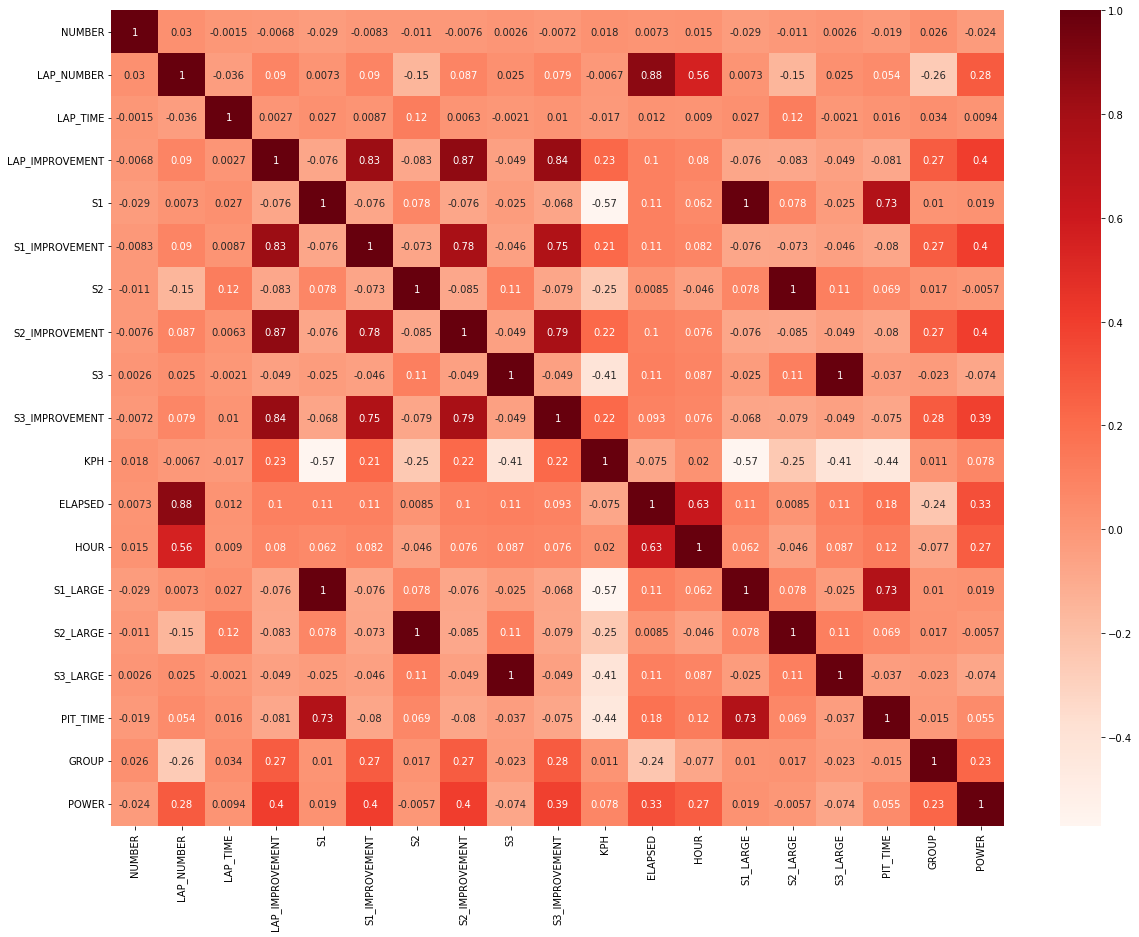

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(20,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

###SVM Regressor

In [ ]:

from sklearn import svm

regr   = svm.SVR()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_val)

np.sqrt(mean_squared_log_error(y_val, y_pred))

0.546795682407487

In [ ]:
y_test_pred = regr.predict(testX)
submission_df_SVM = pd.DataFrame(y_test_pred)
submission_df_SVM.to_csv('sub_one_hot_SVM.csv', index=False)

###RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Get the mean absolute error on the validation data
y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_log_error(y_val, y_pred))

print('Random forest validation RMSE = ', rmse)

In [ ]:
y_test_pred = regr.predict(testX)
submission_df_RF = pd.DataFrame(y_test_pred)
submission_df_RF.columns = ["LAP_TIME"]
submission_df_RF.to_csv('sub_one_hot_RF.csv', index=False)

###XGBoost

####XGBoost Model Selection

In [ ]:
!pip install xgboost==1.5 


In [ ]:
import sklearn
from sklearn import metrics

sorted(sklearn.metrics.SCORERS.keys())

In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators':[10, 50, 75, 100, 250, 500, 750, 1000],
#               'max_depth':[3, 4, 5],
#               'gamma': [1, 5, 10],
#               'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#               'learning_rate': [0.01, 0.05, 0.1, 0.001, 0.005, 0.009]
#               }

parameters = {'n_estimators':[200],
              'max_depth':[2, 3, 4],
              'gamma': [0.1],
              'colsample_bytree': [0.5, 0.9],
              'learning_rate': [0.01, 0.05, 0.1],
              'objective':['reg:squarederror']
              }

XGBModel = XGBRegressor()
  
xgbmodel = GridSearchCV(XGBModel, param_grid=parameters, scoring='neg_mean_squared_log_error', cv = 10)
# XGBModel.fit(train_X,train_y , verbose=False)

# eval_set = [(X_val, y_val)]
# model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

xgbmodel.fit(X_train,y_train, verbose=True)
# sorted(xgbmodel.cv_results_.keys())




GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,


In [ ]:

print(xgbmodel.best_params_)

print(xgbmodel.best_score_)


{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}
-0.5838194362765428


In [ ]:

from sklearn.externals import joblib
joblib.dump(xgbmodel, 'xgbmodel_sklearn.pkl')

# xgbmodel.save_model("xgbmodel_sklearn.json")

!cp xgbmodel_sklearn.pkl /content/drive/MyDrive/ML/NLP/F1_hackathon/



###XGBoost Training

In [ ]:

#{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 250}
#XGBoost validation RMSE =  0.5322364532852599

#{'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 250}  
#XGBoost validation RMSE =  0.5297175217856089

#{'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 285}  
#XGBoost validation RMSE =  0.528959708134752


#{'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 285}  
#no CROSSING_FINISH_LANE_IN_PIT column, mean KPH
#XGBoost validation RMSE =  0.5288903599654621
#test score: 0.70630

#{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250, 'objective': 'reg:squarederror'}
#no CROSSING_FINISH_LANE_IN_PIT column, mean KPH  #combined weather column
#XGBoost validation RMSE =  0.5457443738578217
#test score: 0.70244

#{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250, 'objective': 'reg:squarederror'}
#with weather data, mean POWER, KPH, no CROSSING_FINISH_LINE_IN_PIT, DRIVER_NUMBER
#XGBoost validation RMSE =  0.5456228927807572
#test score: 0.70224


#{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 275, 'objective': 'reg:squarederror'}
#without weather data, mean POWER, KPH, no CROSSING_FINISH_LINE_IN_PIT, DRIVER_NUMBER
#XGBoost validation RMSE =  0.5287775760302842
#test score: 0.70346

#{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 200, 'objective': 'reg:squarederror'}


In [ ]:
import xgboost
from xgboost import XGBRegressor


XGBModel = XGBRegressor(
                      learning_rate=0.01,  
                      n_estimators=200, 
                      max_depth=2, 
                      colsample_bytree = 0.5,
                      gamma= 0.1,
                      objective='reg:squarederror')
  
  
# XGBModel.fit(train_X,train_y , verbose=False)

eval_set = [(X_val, y_val)]
# model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

XGBModel.fit(X_train,y_train, eval_metric="rmsle", eval_set=eval_set)
# XGBModel.fit(X,y)
  

In [ ]:

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(X_val)

rmse = np.sqrt(mean_squared_log_error(y_val, XGBpredictions))
print('XGBoost validation RMSE = ', rmse)

# XGBoost validation RMSE =  0.7767064839192265


XGBoost validation RMSE =  0.7747822383581132


In [ ]:

y_test_pred = XGBModel.predict(testX)

submission_df_XG = pd.DataFrame(y_test_pred, columns=['LAP_TIME'])
submission_df_XG.to_csv('sub_3.csv', index=False)


###xgb train

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_val, label=y_val)

param = {
    'learning_rate': 0.01,  
    # 'n_estimators': 250, 
    'max_depth': 4, 
    'colsample_bytree': 0.9,
    'gamma': 1, 
    'objective': 'reg:squarederror'} 

steps = 290  # The number of training iterations

model = xgb.train(param, D_train, steps)

preds = model.predict(D_test)


rmse = np.sqrt(mean_squared_log_error(y_val, preds))
print('XGBoost validation RMSE = ', rmse)

#250-XGBoost validation RMSE =  0.5297175217856089
#300-XGBoost validation RMSE =  0.5289854801407681
#XGBoost validation RMSE =  0.5289002942479997




  

XGBoost validation RMSE =  0.5289002942479997


In [ ]:

y_test_pred = XGBModel.predict(testX)
submission_df_XG = pd.DataFrame(y_test_pred)
submission_df_XG.columns = ["LAP_TIME"]
submission_df_XG.to_csv('submission_fn_XG13.csv', index=False)


In [ ]:

# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import xgboost
from xgboost import XGBRegressor
# load data


model = XGBRegressor(
                      learning_rate=0.01,  
                      n_estimators=250, 
                      max_depth=4, 
                      colsample_bytree = 0.9,
                      gamma= 1,
                      objective='reg:squarederror')
  

X_test= X_val
y_test=y_val
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train,y_train, eval_metric=["error", "rmsle"], eval_set=eval_set, verbose=True)

# make predictions for test data

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['rmsle'], label='Train')
ax.plot(x_axis, results['validation_1']['rmsle'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [ ]:
results

In [ ]:
predictions = pd.DataFrame(y_val, XGBpredictions)

array([ 17.11476135,  16.36309052, -14.59975433, ...,   7.29431152,
        -1.56993866, -15.15593719])

In [ ]:
X_val.shape

(3392, 83)

In [ ]:
#submission_fn_XG3.csv  0.70442
#submission_fn_XG4.csv  0.71610


###Custom XG Boost Metrics


In [ ]:
# from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error


XGBModel = XGBRegressor(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.9,
                      subsample = 0.8, 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=3, 
                      gamma=1,
                      objective='reg:squarederror',
                      tree_method="hist",
                      eval_metric=mean_squared_log_error)
  
# XGBModel.fit(train_X,train_y , verbose=False)
XGBModel.fit(X_train,y_train, eval_metric='rmsle', eval_set=[(X_val, y_val)])




In [ ]:
!pip install xgboost


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
X, y = load_diabetes(return_X_y=True)
reg = xgb.XGBRegressor(
    tree_method="hist",
    eval_metric=mean_absolute_error
)
reg.fit(X, y, eval_set=[(X, y)])

### Neural Net

In [ ]:

from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

import keras
import numpy as np
from tensorflow.python.ops import math_ops

def custom_loss(y_true, y_pred):
 diff = math_ops.squared_difference(y_pred, y_true)  #squared difference
 loss = K.mean(diff, axis=-1) #mean over last dimension
 loss = loss / 10.0
 return loss

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss=custom_loss, optimizer='rmsprop', metrics=['mean_absolute_error'])
NN_model.summary()




Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 128)               10752     
                                                                 
 dense_90 (Dense)            (None, 256)               33024     
                                                                 
 dense_91 (Dense)            (None, 256)               65792     
                                                                 
 dense_92 (Dense)            (None, 256)               65792     
                                                                 
 dense_93 (Dense)            (None, 256)               65792     
                                                                 
 dense_94 (Dense)            (None, 1)                 257       
                                                                 
Total params: 241,409
Trainable params: 241,409
Non-t

In [ ]:

# checkpoint_name = 'Weights_f-{epoch:03d}--{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]
callbacks_list = None

In [ ]:
NN_model.fit(train, target, epochs=150, batch_size=16, validation_split = 0.2, callbacks=callbacks_list)


In [ ]:
# Load wights file of the best model :
# wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
# NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
# def make_submission(prediction, sub_name):
#   my_submission = pd.DataFrame({'Id':pd.read_csv('test.csv').Id,'SalePrice':prediction})
#   my_submission.to_csv('{}.csv'.format(sub_name),index=False)
#   print('A submission file has been made')

predictions = NN_model.predict(test)
# make_submission(predictions[:,0],'submission(NN).csv')

In [ ]:
submission_df_NN = pd.DataFrame(predictions)
submission_df_NN.columns = ["LAP_TIME"]
submission_df_NN.to_csv('submission_NN.csv', index=False)


In [ ]:
0.5465152571940624
Random forest validation MAE =  0.5371144902997661
XGBoost validation RMSE =  0.5325518226994682



In [ ]:
def time2seconds(time):
  if type(time) != str:
    return time

  parts = [float(p) for p in time.split(':')]
  print(parts)
  parts = [p * (60 ** i) for i, p in enumerate(reversed(parts))]
  return sum(parts)

In [ ]:
time2seconds('05:25.7')

[5.0, 25.7]


325.7

### AdaBoost

In [ ]:
AdaBoostRegressor.get_params().keys()

TypeError: ignored

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators':[10, 50, 75, 100, 250, 500, 750, 1000],
#               'max_depth':[3, 4, 5],
#               'gamma': [1, 5, 10],
#               'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#               'learning_rate': [0.01, 0.05, 0.1, 0.001, 0.005, 0.009]
#               }

parameters = {'n_estimators':[100, 150, 250, 300],
              # 'max_depth':[2],
              # 'gamma': [0.1, 0.5, 1],
              'learning_rate': [0.01, 0.05, 1],
              'loss':['square']
              }

AdaBoostModel = AdaBoostRegressor()
  
adaboostmodel = GridSearchCV(AdaBoostModel, param_grid=parameters, scoring='neg_mean_squared_log_error', cv = 10)
# XGBModel.fit(train_X,train_y , verbose=False)

# eval_set = [(X_val, y_val)]
# model.fit(X_train, y_train, eval_metric="error", eval_set=eval_set, verbose=True)

adaboostmodel.fit(X_train,y_train)
# sorted(xgbmodel.cv_results_.keys())


GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 1], 'loss': ['square'],
                         'n_estimators': [100, 150, 250, 300]},
             scoring='neg_mean_squared_log_error')

In [ ]:
adaboostmodel.best_estimator_

AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=100)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
# Create adaboost classifer object
adaboostreg = AdaBoostRegressor(n_estimators=200, learning_rate=0.01, loss='square')
# adaboostreg = AdaBoostRegressor()
# Train Adaboost Classifer
model = adaboostreg.fit(X_train, y_train)

# Use the AdaboostClassifer predict method on the test data
y_predict = model.predict(X_val)

rmse = np.sqrt(mean_squared_log_error(y_val, y_predict)) 
rmse

0.5510309935746373

In [ ]:

y_test_pred = model.predict(testX)
submission_df_XG = pd.DataFrame(y_test_pred)
submission_df_XG.columns = ["LAP_TIME"]
submission_df_XG.to_csv('submission_AdB2.csv', index=False)

In [ ]:
model.get_params

<bound method BaseEstimator.get_params of AdaBoostRegressor(learning_rate=1.5, n_estimators=5, random_state=1)>